In [1]:
import gym
from gym.envs.registration import register
import numpy as np
# from mdptoolbox import mdp
from hiive.mdptoolbox import mdp

from IPython.display import clear_output
import time
import random
import matplotlib.pyplot as plt
import hiive.mdptoolbox.example
%matplotlib inline

In [2]:
P, R = hiive.mdptoolbox.example.forest(S=3000)

In [3]:
P.shape
R.shape

(3000, 2)

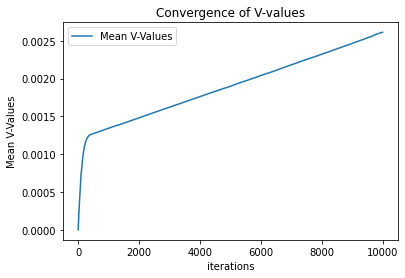

In [4]:
np.random.seed(0)
discount = 0.97
# ql = mdp.QLearning(P, R, gamma=discount, 
#                         alpha=0.1, alpha_decay=0.99, alpha_min=0.001,
#                         epsilon=1.0, epsilon_min=0.1, epsilon_decay=0.99,
#                         run_stat_frequency=1)
ql = mdp.QLearning(P, R, discount,run_stat_frequency=1)
# ql.max_iter= 100000
ql.setSilent()
ql.run()

y = [run_stats['Mean V'] for run_stats in ql.run_stats]
plt.xlabel('iterations')
plt.ylabel('Mean V-Values')
plt.plot(y, label="Mean V-Values")
plt.legend()
plt.title("Convergence of V-values")
plt.show()

## QL

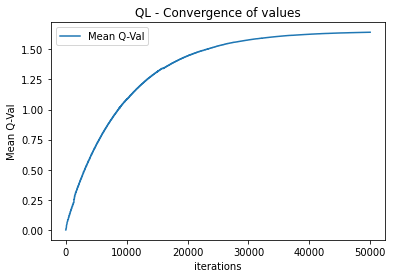

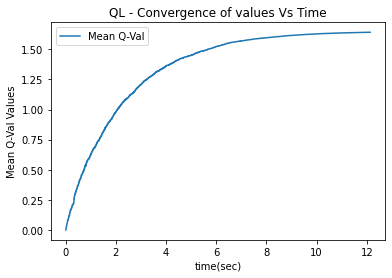

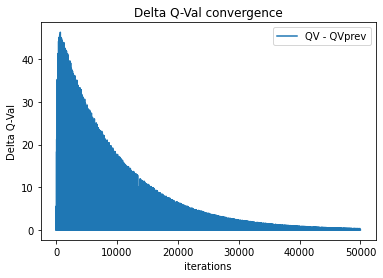

In [5]:
## Convergence - QL

%matplotlib inline
np.random.seed(0)
discount = 0.99
ql = mdp.QLearning(P, R, gamma=discount, 
                        alpha=1.0, alpha_decay=0.9999, alpha_min=0.001,
                        epsilon=1.0, epsilon_min=0.1, epsilon_decay=0.99,
                        run_stat_frequency=1)
# ql = mdp.QLearning(P, R, discount,run_stat_frequency=1)
ql.max_iter= 50000
ql.setSilent()
ql.run()

y = [run_stats['Mean V'] for run_stats in ql.run_stats]
plt.xlabel('iterations')
plt.ylabel('Mean Q-Val')
plt.plot(y, label="Mean Q-Val")
plt.legend()
plt.title("QL - Convergence of values")
plt.show()

y = [run_stats['Mean V'] for run_stats in ql.run_stats]
x = [run_stats['Time'] for run_stats in ql.run_stats]
plt.xlabel('time(sec)')
plt.ylabel('Mean Q-Val Values')
plt.plot(x, y, label="Mean Q-Val")
plt.legend()
plt.title("QL - Convergence of values Vs Time")
plt.show()

# Convergence as a function of time
y = [run_stats['Error'] for run_stats in ql.run_stats]
# x = [run_stats['Time'] for run_stats in ql.run_stats]
plt.xlabel('iterations')
plt.ylabel('Delta Q-Val')
plt.plot(y, label="QV - QVprev")
plt.legend()
plt.title("Delta Q-Val convergence")
plt.show()


Text(0.5, 1.0, 'Exploration/Exploitation balance (HyperParam - epsdecay)')

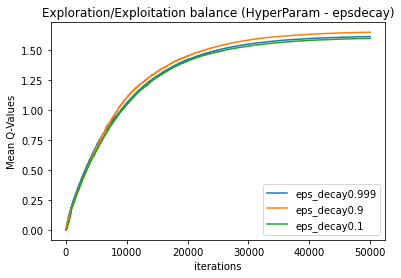

In [10]:
## QL HyperParam tuning
np.random.seed(0)
plt.figure()
discount = 0.99
## Exploration Vs Exploitation(eps=0.99 1%exploitation)

for decay in [0.999, 0.9, 0.1]:
    ql = mdp.QLearning(P, R, gamma=discount, 
                            alpha=1.0, alpha_decay=0.9999, alpha_min=0.001,
                            epsilon=1.0, epsilon_min=0.1, epsilon_decay=decay,
                            run_stat_frequency=1)
    ql.max_iter= 50000
    ql.setSilent()
    ql.run()

    y = [run_stats['Mean V'] for run_stats in ql.run_stats]
    plt.xlabel('iterations')
    plt.ylabel('Mean Q-Values')
    plt.plot(y, label="eps_decay"+str(decay))
    plt.legend()

plt.title("Exploration/Exploitation balance (HyperParam - epsdecay)")


Text(0.5, 1.0, 'HyperParam - alpha Decay')

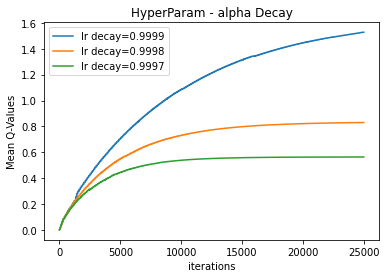

In [13]:
## QL HyperParam tuning
# HP tuning
np.random.seed(0)
plt.figure()
discount = 0.99

## Exploration Vs Exploitation(eps=0.99 1%exploitation)
for aDecay in [0.9999, 0.9998, 0.9997]:
    discount = 0.99
    ql = mdp.QLearning(P, R, gamma=discount, 
                            alpha=1.0, alpha_decay=aDecay, alpha_min=0.001,
                            epsilon=1.0, epsilon_min=0.1, epsilon_decay=0.99,
                            run_stat_frequency=1)
    # ql = mdp.QLearning(P, R, discount,run_stat_frequency=1)
    ql.max_iter= 25000
    ql.setSilent()
    ql.run()

    y = [run_stats['Mean V'] for run_stats in ql.run_stats]
    plt.xlabel('iterations')
    plt.ylabel('Mean Q-Values')
    plt.plot(y, label="lr decay="+str(aDecay))
    plt.legend()

plt.title("HyperParam - alpha Decay")


In [14]:
print('discount', discount, 'aDecay', aDecay, 'epsilon_decay', decay)

discount 0.99 aDecay 0.9997 epsilon_decay 0.9999


In [ ]:
### QL Optimal Policy Plot
discount = 0.99
aDecay = 0.9999
eps_decay = 0.999
ql = mdp.QLearning(P, R, gamma=discount, 
                            alpha=1.0, alpha_decay=0.9997, alpha_min=0.001,
                            epsilon=1.0, epsilon_min=0.1, epsilon_decay=0.99,
                            run_stat_frequency=1)
ql.max_iter= 40000
ql.setSilent()
ql.run()

# render_policy(ql.policy, "QL Policy", holes)

## VI

Iteration 70
CPU time 0.6474356651306152


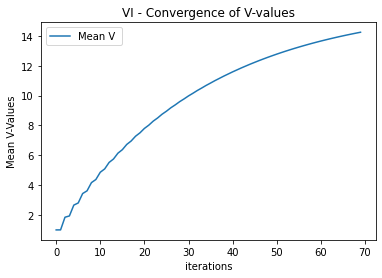

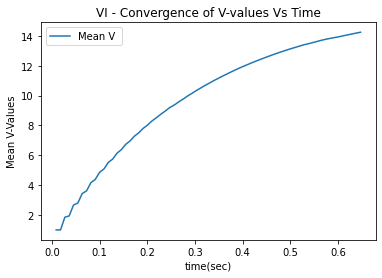

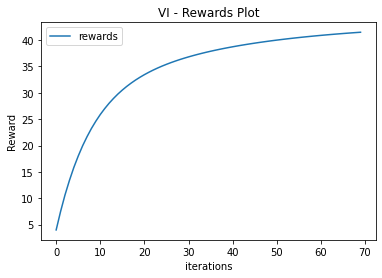

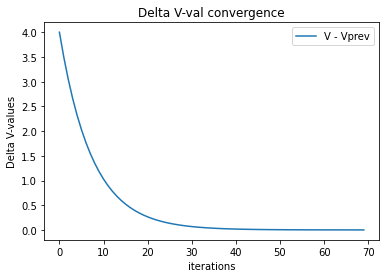

In [16]:
discount = 0.97
vi = mdp.ValueIteration(P, R, discount, epsilon=0.01, max_iter=5000, initial_value=0, 
                        run_stat_frequency=1)
# vi.setVerbose()
vi.run()

print("Iteration", vi.iter)
print("CPU time", vi.time)
# print(vi.run_stats[0:])

y = [run_stats['Mean V'] for run_stats in vi.run_stats]
plt.xlabel('iterations')
plt.ylabel('Mean V-Values')
plt.plot(y, label="Mean V ")
plt.legend()
plt.title("VI - Convergence of V-values")
plt.show()

y = [run_stats['Mean V'] for run_stats in vi.run_stats]
x = [run_stats['Time'] for run_stats in vi.run_stats]
plt.xlabel('time(sec)')
plt.ylabel('Mean V-Values')
plt.plot(x, y, label="Mean V ")
plt.legend()
plt.title("VI - Convergence of V-values Vs Time")
plt.show()

y = [run_stats['Reward'] for run_stats in vi.run_stats]
plt.xlabel('iterations')
plt.ylabel('Reward')
plt.plot(y, label="rewards")
plt.legend()
plt.title("VI - Rewards Plot")
plt.show()

# Convergence as a function of time
y = [run_stats['Error'] for run_stats in vi.run_stats]
plt.xlabel('iterations')
plt.ylabel('Delta V-values')
plt.plot(y, label="V - Vprev")
plt.legend()
plt.title("Delta V-val convergence")
plt.show()

In [27]:
print(np.count_nonzero(vi.policy))

2984


## PI

Iteration 15
CPU time 17.15214490890503


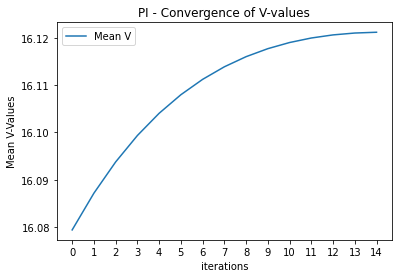

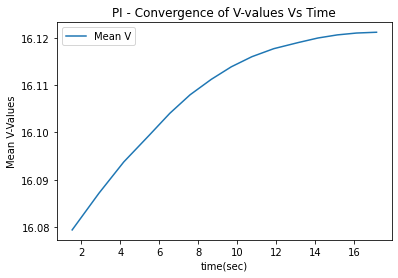

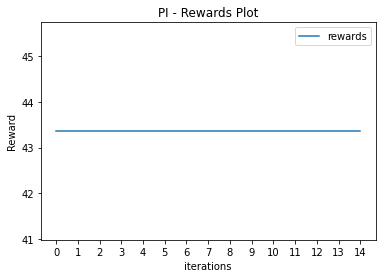

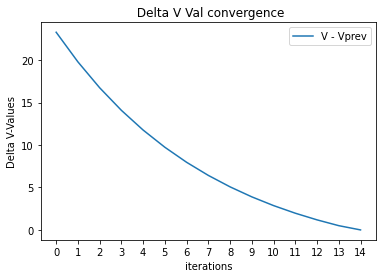

In [17]:
## Optimal PI policy
vi=None
discount = 0.97
pi = mdp.PolicyIteration(P, R, discount, eval_type=0, max_iter=5000, run_stat_frequency=1)
# vi.setVerbose()
pi.run()

print("Iteration", pi.iter)
print("CPU time", pi.time)
# print(vi.run_stats[0:])

y = [run_stats['Mean V'] for run_stats in pi.run_stats]
plt.xticks(range(len(y)))
plt.xlabel('iterations')
plt.ylabel('Mean V-Values')
plt.plot(y, label="Mean V")
plt.legend()
plt.title("PI - Convergence of V-values")
plt.show()

y = [run_stats['Mean V'] for run_stats in pi.run_stats]
x = [run_stats['Time'] for run_stats in pi.run_stats]
plt.xlabel('time(sec)')
plt.ylabel('Mean V-Values')
plt.plot(x, y, label="Mean V")
plt.legend()
plt.title("PI - Convergence of V-values Vs Time")
plt.show()

y = [run_stats['Reward'] for run_stats in pi.run_stats]
plt.xticks(range(len(y)))
plt.xlabel('iterations')
plt.ylabel('Reward')
plt.plot(y, label="rewards")
plt.legend()
plt.title("PI - Rewards Plot")
plt.show()

# Convergence as a function of time
y = [run_stats['Error'] for run_stats in pi.run_stats]
plt.xticks(range(len(y)))
plt.xlabel('iterations')
plt.ylabel('Delta V-Values')
plt.plot(y, label="V - Vprev")
plt.legend()
plt.title(" Delta V Val convergence")
plt.show()

In [18]:
pi.run_stats[-1]

{'State': None,
 'Action': None,
 'Reward': 43.36257887678614,
 'Error': 7.105427357601002e-15,
 'Time': 17.150823831558228,
 'Max V': 43.36257887678614,
 'Mean V': 16.12116607342496,
 'Iteration': 15}

## TODO: Show optimal policy

### Varying gamma

In [19]:
print("VI")
for discount in [0.90, 0.92, 0.94, 0.96, 0.98]:
    vi = mdp.ValueIteration(P, R, discount, epsilon=0.01, max_iter=5000, initial_value=0)
    vi.run()
    print("discount", discount, "iter", vi.iter, ", time", vi.time)

print("PI")
for discount in [0.90, 0.92, 0.94, 0.96, 0.98]:
    pi = mdp.PolicyIteration(P, R, discount, eval_type=1, max_iter=5000)
    pi.run()
    print("discount", discount, ", iter", pi.iter, ", time", pi.time)
    
print("QL")
for discount in [0.90, 0.92, 0.94, 0.96, 0.98]:
    ql = mdp.QLearning(P, R, gamma=discount, 
                                alpha=1.0, alpha_decay=0.9997, alpha_min=0.001,
                                epsilon=1.0, epsilon_min=0.1, epsilon_decay=0.99,
                                run_stat_frequency=1)
    ql.setSilent()
    ql.run()
    print("discount", discount, ", iter", ql.run_stats[-1]['Iteration'], ", time", ql.run_stats[-1]['Time'])


VI
discount 0.9 iter 39 , time 0.36277294158935547
discount 0.92 iter 45 , time 0.4132561683654785
discount 0.94 iter 53 , time 0.7785117626190186
discount 0.96 iter 63 , time 0.6895458698272705
discount 0.98 iter 79 , time 0.793917179107666
PI
discount 0.9 , iter 10 , time 6.84073805809021
discount 0.92 , iter 11 , time 8.137449979782104
discount 0.94 , iter 12 , time 11.660302877426147
discount 0.96 , iter 14 , time 20.275229930877686
discount 0.98 , iter 17 , time 54.09255027770996
QL
discount 0.9 , iter 10000 , time 2.5228049755096436
discount 0.92 , iter 10000 , time 2.5596351623535156
discount 0.94 , iter 10000 , time 2.6026222705841064
discount 0.96 , iter 10000 , time 2.5856072902679443
discount 0.98 , iter 10000 , time 2.564328908920288


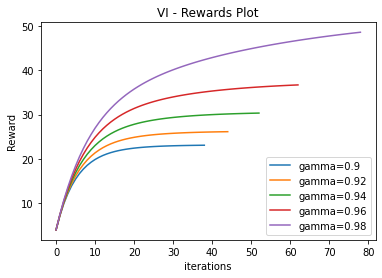

In [21]:
plt.figure()
for discount in [0.90, 0.92, 0.94, 0.96, 0.98]:
    vi = mdp.ValueIteration(P, R, discount, epsilon=0.01, max_iter=5000, initial_value=0)
    vi.run()
    y = [run_stats['Reward'] for run_stats in vi.run_stats]
    plt.xlabel('iterations')
    plt.ylabel('Reward')
    plt.plot(y, label="gamma="+str(discount))
    plt.legend()
    
plt.title("VI - Rewards Plot")
plt.show()

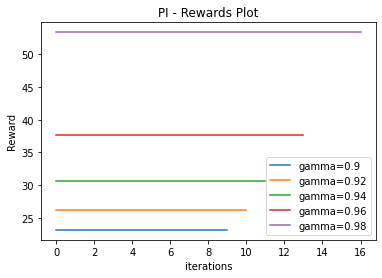

In [22]:
plt.figure()
for discount in [0.90, 0.92, 0.94, 0.96, 0.98]:
    pi = mdp.PolicyIteration(P, R, discount, eval_type=1, max_iter=5000)
    pi.run()
    y = [run_stats['Reward'] for run_stats in pi.run_stats]
    plt.xlabel('iterations')
    plt.ylabel('Reward')
    plt.plot(y, label="gamma="+str(discount))
    plt.legend()
    
plt.title("PI - Rewards Plot")
plt.show()

In [28]:
np.random.seed(0)
discount=0.98

pi = mdp.PolicyIteration(P, R, discount, eval_type=1, max_iter=5000)
pi.run()
print(np.count_nonzero(pi.policy))

vi = mdp.ValueIteration(P, R, discount, epsilon=0.01, max_iter=5000, initial_value=0)
vi.run()
print(np.count_nonzero(vi.policy))


ql = mdp.QLearning(P, R, gamma=discount, 
                            alpha=1.0, alpha_decay=0.9997, alpha_min=0.001,
                            epsilon=1.0, epsilon_min=0.1, epsilon_decay=0.99,
                            run_stat_frequency=1)
ql.setSilent()
ql.run()
print(np.count_nonzero(ql.policy))
print(len(ql.policy))

2982
2982
35
3000


In [29]:
np.random.seed(0)
discount=0.98
ql = mdp.QLearning(P, R, gamma=discount, 
                            alpha=1.0, alpha_decay=0.9997, alpha_min=0.001,
                            epsilon=1.0, epsilon_min=0.1, epsilon_decay=0.99,
                            run_stat_frequency=1)
ql.max_iter= 50000
ql.setSilent()
ql.run()
print(np.count_nonzero(ql.policy))
print(len(ql.policy))    

150
3000


### reduce state space

In [30]:
P_300, R_300 = hiive.mdptoolbox.example.forest(S=10)

In [24]:
discount = 0.97
print("VI")
vi_300 = mdp.ValueIteration(P_300, R_300, discount, epsilon=0.01, max_iter=5000, initial_value=0, 
                        run_stat_frequency=1)
# vi.setVerbose()
vi_300.run()

vi = mdp.ValueIteration(P, R, discount, epsilon=0.01, max_iter=5000, initial_value=0, 
                        run_stat_frequency=1)
# vi.setVerbose()
vi.run()

print("Iteration Forest small", vi_300.iter)
print("CPU time Forest small", vi_300.time)

print("Iteration Forest Large", vi.iter)
print("CPU time Forest Large", vi.time)

print("")
print("PI")
pi_300 = mdp.PolicyIteration(P_300, R_300, discount, eval_type=1, max_iter=5000)
pi_300.run()

pi = mdp.PolicyIteration(P, R, discount, eval_type=1, max_iter=5000)
pi.run()

print("Iteration Forest small", pi_300.iter)
print("CPU time Forest small", pi_300.time)

print("Iteration Forest Large", pi.iter)
print("CPU time Forest Large", pi.time)

print("")
print("QL")
ql_300 = mdp.QLearning(P_300, R_300, gamma=discount, 
                                alpha=1.0, alpha_decay=0.9997, alpha_min=0.001,
                                epsilon=1.0, epsilon_min=0.1, epsilon_decay=0.99,
                                run_stat_frequency=1)
ql_300.setSilent()
ql_300.run()

print("Iteration Forest small", ql_300.run_stats[-1]['Iteration'])
print("CPU time Forest small", ql_300.run_stats[-1]['Time'])

ql = mdp.QLearning(P, R, gamma=discount, 
                                alpha=1.0, alpha_decay=0.9997, alpha_min=0.001,
                                epsilon=1.0, epsilon_min=0.1, epsilon_decay=0.99,
                                run_stat_frequency=1)
ql.setSilent()
ql.run()

print("Iteration Forest Large", ql.run_stats[-1]['Iteration'])
print("CPU time Forest Large", ql.run_stats[-1]['Time'])



VI
Iteration Forest small 13
CPU time Forest small 0.007912158966064453
Iteration Forest Large 70
CPU time Forest Large 0.7058379650115967

PI
Iteration Forest small 9
CPU time Forest small 0.0826730728149414
Iteration Forest Large 15
CPU time Forest Large 29.787622213363647

QL
Iteration Forest small 10000
CPU time Forest small 1.3537440299987793
Iteration Forest Large 10000
CPU time Forest Large 2.8386268615722656


In [25]:
# policy difference
vi_300.policy == pi_300.policy

True

In [ ]:
print(ql_300.policy)

In [ ]:
print(vi_300.policy)

In [33]:
np.random.seed(0)
discount=0.98

P, R = hiive.mdptoolbox.example.forest(S=20)

pi = mdp.PolicyIteration(P, R, discount, eval_type=1, max_iter=5000)
pi.run()
print(np.count_nonzero(pi.policy))

vi = mdp.ValueIteration(P, R, discount, epsilon=0.01, max_iter=5000, initial_value=0)
vi.run()
print(np.count_nonzero(vi.policy))


ql = mdp.QLearning(P, R, gamma=discount, 
                            alpha=1.0, alpha_decay=0.9997, alpha_min=0.001,
                            epsilon=1.0, epsilon_min=0.1, epsilon_decay=0.99,
                            run_stat_frequency=1)
# ql.max_iter= 50000
ql.setSilent()
ql.run()
print(np.count_nonzero(ql.policy))
print(len(ql.policy))

2
2
6
20
